# Introduction
#### Shallow water gravity waves are produced by large-scale disturbances and they can only exist in the presence of a free surface or a density discontinuity (thermocline). In this case study, the fluid has a free surface that experiences upward and downward perturbations. The perturbations create a sinusoidal pattern moving at some velocity, u.



## Equations
# 

## Numerical Methods

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import spdiags

In [74]:
# parameters
xf = 24900*1000 #(m) circumference of earth at equator
tf = 24*3600 #(s) 1 day in seconds
gH = 200 #(m/s) zonal wave speed in shallow water (4km)

# grid
dx = 100000
dt = 1000
x = np.arange(0,xf,dx)
t = np.arange(0,tf,dt)

nx = len(x)
nt = len(t)

u1 = 10 #average zonal velocity
u2 = -10 #average zonal velocity

# wave speed
c1 = (u2 + gH)
c2 = (u2 - gH)

# changing wave speed
lam1 = np.zeros(nx)
for i in np.arange(nx):
    lam1[i] = c1*dt/dx

lam2 = np.zeros(nx) 
for i in np.arange(nx):
    lam2[i] = c2*dt/dx 

# initial condition
u1 = np.nan*np.ones([nx,nt])
u1[:,0] = np.exp(-(x**2) / 2) #unsure about initial conditions should be
u1[:,1] = np.exp(-(x**2) / 2)

u2 = np.nan*np.ones([nx,nt])
u2[:,0] = np.exp(-(x**2) / 2) #unsure about initial conditions should be
u2[:,1] = np.exp(-(x**2) / 2)

# matrices
data1 = np.array([(lam1**2)*np.ones(nx), 2*(1-lam1**2)*np.ones(nx), (lam1**2)*np.ones(nx)])
diags1 = np.array([-1, 0, 1])
M1 = spdiags(data, diags, nx, nx).toarray()

data2 = np.array([(lam2**2)*np.ones(nx), 2*(1-lam2**2)*np.ones(nx), (lam2**2)*np.ones(nx)])
diags2 = np.array([-1, 0, 1])
M2 = spdiags(data, diags, nx, nx).toarray()

#Reflective BC
M2[0,0]= 2 - lam**2
M2[nx-1,nx-1] = 2 - lam**2

print(len(x), len(t))

249 87


In [75]:
# solve
for k in np.arange(nt-2):
    u1[:,k+2] = np.matmul(M1,u1[:,k+1]) - u1[:,k]
for k in np.arange(nt-2):
    u2[:,k+2] = np.matmul(M2,u2[:,k+1]) - u2[:,k]

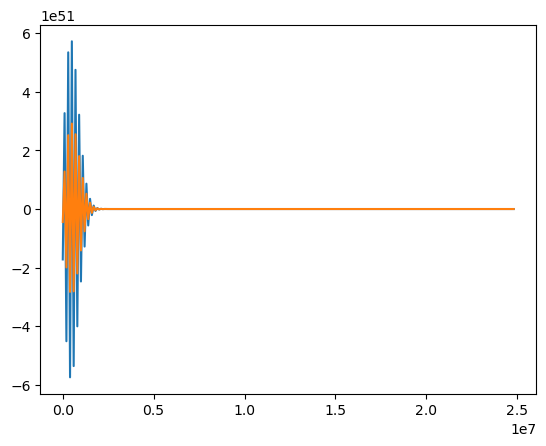

In [80]:
plt.plot(x,u1[:,50])
plt.plot(x,u2[:,50])

## Results

## Figures

## Video Walkthrough

## Reference
#### Holton, J. R. (2004). An introduction to dynamic meteorology. In International Geophysics (Vol. 88). https://doi.org/10.1016/s0074-6142(08)x6005-x